In [406]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from folium.plugins import HeatMapWithTime, DualMap, TimeSliderChoropleth
from IPython.display import HTML, Javascript, IFrame
import branca
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
import warnings 
warnings.filterwarnings('ignore')

In [407]:
# load the data
df = pd.read_csv('./data/cleaned_data/final_data.csv')

## Further Cleaning

In [408]:
# change the rcp column to str
df['rcp'] = df['rcp'].astype(str)

### Greenery area dataset

In [409]:
# Greenery data
# extract the relevant data
greenery_columns = ['long', 'lat', 'year', 'rcp', 'treecanopy', 'bare', 'herb', 'ann_herb', 'litter', 'shrub']
greenery = df[greenery_columns]

# calculate the total greenery
greenery['total'] = greenery['treecanopy'] + greenery['herb'] + greenery['ann_herb'] + greenery['shrub'] + greenery['litter'] - greenery['bare'] 

# save the data to csv file
greenery.to_csv('./data/cleaned_data/greenery_data.csv', index=False)

### Plant litter dataset

In [460]:
# Plant litter dataset
# extract the relevant data
litter_columns = ['long', 'lat', 'year', 'rcp', 'litter', 't_winter', 't_summer', 't_annual']
litter = df[litter_columns]
litter = litter.drop_duplicates(subset=litter_columns)

# # fill the null values with the mean
# litter.loc[:, 't_winter'] = litter['t_winter'].fillna(litter['t_winter'].mean())
# litter.loc[:, 't_summer'] = litter['t_summer'].fillna(litter['t_summer'].mean())
# litter.loc[:, 't_annual'] = litter['t_annual'].fillna(litter['t_annual'].mean())

# drop the null values
litter = litter.dropna()

# save the data to csv file
litter.to_csv('./data/cleaned_data/litter_data.csv', index=False)

# litter

### VWC dataset

In [411]:
# VWC data
# extract the relevant data
vwc_columns = ['long', 'lat', 'year', 'rcp', 'evap_summer', 'vwc_winter_whole', 'vwc_spring_whole', 'vwc_summer_whole', 'vwc_fall_whole']
vwc = df[vwc_columns]

# deal with NaN values
# fill the null values with the mean of the column
null_columns = ['vwc_winter_whole', 'vwc_spring_whole', 'vwc_summer_whole', 'vwc_fall_whole']
vwc.loc[:, null_columns] = vwc[null_columns].fillna(vwc[null_columns].mean())

# save it to a new csv file
vwc.to_csv('./data/cleaned_data/vwc_data.csv', index=False)

### Summer dataset

In [412]:
# summer related data
# extract the relevant data
summer_columns = ['long', 'lat', 'year', 'rcp', 'drysoildays_summer_whole', 'evap_summer', 'nondryswa_summer_whole', 'ppt_summer', 'tmax_summer', 'vwc_summer_whole']
summer = df[summer_columns]

# fill missing values with the mean
summer.loc[:, 'drysoildays_summer_whole'] = summer['drysoildays_summer_whole'].fillna(summer['drysoildays_summer_whole'].mean())
summer.loc[:, 'evap_summer'] = summer['evap_summer'].fillna(summer['evap_summer'].mean())
summer.loc[:, 'nondryswa_summer_whole'] = summer['nondryswa_summer_whole'].fillna(summer['nondryswa_summer_whole'].mean())
summer.loc[:, 'ppt_summer'] = summer['ppt_summer'].fillna(summer['ppt_summer'].mean())
summer.loc[:, 'tmax_summer'] = summer['tmax_summer'].fillna(summer['tmax_summer'].mean())

# round the columns
summer = summer.round({'drysoildays_summer_whole': 3, 'evap_summer': 3, 'nondryswa_summer_whole': 3, 'ppt_summer': 3, 'tmax_summer': 3})

# save the data to csv file
summer.to_csv('./data/cleaned_data/summer_data.csv', index=False)

### Summer vs. Winter dataset

In [413]:
# summer vs. winter data
# extract the relevant data
summer_winter_columns = ['long', 'lat', 'year', 'rcp', 'ppt_annual', 'ppt_summer', 'ppt_winter', 't_summer', 't_winter', 'tmax_summer', 'tmin_winter']
summer_winter = df[summer_winter_columns]

# save the data to csv file
summer_winter.to_csv('./data/cleaned_data/summer_winter_data.csv', index=False)

## Visualization

### Greenery area dataset

In [414]:
# load the data
greenery = pd.read_csv('./data/cleaned_data/greenery_data.csv')
greenery

,long,lat,year,rcp,treecanopy,bare,herb,ann_herb,litter,shrub,total
0,-110.0472,37.60413,1980,historical,0,84,5,0,11,7,-61
1,-110.0472,37.60413,1980,historical,0,84,5,0,11,7,-61
2,-110.0472,37.60413,1980,historical,0,84,5,0,11,7,-61
3,-110.0472,37.60413,1980,historical,0,84,5,0,11,7,-61
4,-110.0472,37.60413,1980,historical,0,84,5,0,11,7,-61
...,...,...,...,...,...,...,...,...,...,...,...
69618,-109.9659,37.62525,2024,8.5,18,37,18,0,19,22,40
69619,-109.9659,37.62525,2024,8.5,18,37,18,0,19,22,40
69620,-109.9659,37.62525,2024,8.5,18,37,18,0,19,22,40
69621,-109.9659,37.62525,2024,8.5,18,37,18,0,19,22,40


In [415]:
# change the rcp to str
greenery['rcp'] = greenery['rcp'].astype(str)

# group by necessary columns
greenery_temp = greenery.groupby(['long', 'lat', 'year', 'rcp'])['total'].sum().reset_index()

greenery_temp

,long,lat,year,rcp,total
0,-110.0472,37.60413,1980,historical,-305
1,-110.0472,37.60413,1981,historical,-122
2,-110.0472,37.60413,1982,historical,-122
3,-110.0472,37.60413,1983,historical,-122
4,-110.0472,37.60413,1984,historical,-305
...,...,...,...,...,...
5306,-109.9659,37.62525,2022,8.5,2920
5307,-109.9659,37.62525,2023,4.5,2160
5308,-109.9659,37.62525,2023,8.5,1920
5309,-109.9659,37.62525,2024,4.5,2400


In [416]:
# further data processing
greenery_total = greenery.groupby(['long', 'lat', 'year'])['total'].sum().reset_index()
greenery_total

,long,lat,year,total
0,-110.0472,37.60413,1980,-305
1,-110.0472,37.60413,1981,-122
2,-110.0472,37.60413,1982,-122
3,-110.0472,37.60413,1983,-122
4,-110.0472,37.60413,1984,-305
...,...,...,...,...
4854,-109.9659,37.62525,2018,400
4855,-109.9659,37.62525,2021,4360
4856,-109.9659,37.62525,2022,5360
4857,-109.9659,37.62525,2023,4080


In [417]:
greenery_total.head(10)

,long,lat,year,total
0,-110.0472,37.60413,1980,-305
1,-110.0472,37.60413,1981,-122
2,-110.0472,37.60413,1982,-122
3,-110.0472,37.60413,1983,-122
4,-110.0472,37.60413,1984,-305
5,-110.0472,37.60413,1985,-122
6,-110.0472,37.60413,1986,-122
7,-110.0472,37.60413,1987,-122
8,-110.0472,37.60413,1988,-122
9,-110.0472,37.60413,1989,-122


In [418]:
greenery_total.total.unique()

array([  -305,   -122,  -8357,  -8174,  -7503,  -7137,    -96,   -240,
        -5616,  -5088,  -6096,  -5520,    -58,   -145,  -3654,  -3132,
        -3103,  -3509,    -75,    -30,   -255,   -150,  -2250,  -1785,
        -1695,    -25,   -225,   -100,  -2275,  -2400,  -1750,  -3886,
        -3335,  -4466,  -3161,    -70,   -175,  -4235,  -4200,  -5110,
        -4130,    -90,    -36,   -180,  -2592,  -2160,  -2466,  -1926,
        -2016,  -2304,   -118,   -295,   -590,  -7552,  -6490,  -7139,
        -6962,   -144,   -360,  -9648,  -8424,  -9504,  -8712,      2,
            5,    107,    149,    123,    119,   -140,    -28,  -1498,
        -1652,  -1820,    -18,    -45,  -1170,  -1197,  -1152,   -882,
           60,     24,    120,   1644,   1224,   1320,   1548,    -76,
         -190,  -4902,  -4750,  -4104,   -210,    -84,   -420,  -5628,
        -5418,  -5292,  -5250,     12,     30,    768,    636,    606,
          762,   -174,   -435,   -870, -10614, -12441,  -9744, -10005,
      

In [419]:
# filter out the data
data_2018 = greenery_total[greenery_total['year'] == 2018]
data_1980 = greenery_total[greenery_total['year'] == 1980]
data_2024 = greenery_total[greenery_total['year'] == 2024]

In [420]:
# create a folium heatmap of the 1980 data
map_center = [greenery_total['lat'].mean(), greenery_total['long'].mean()]
map_width = 800  
map_height = 600 
mymap_1980 = folium.Map(location=map_center, zoom_start=13, width=map_width, height=map_height)

heat_data_green = data_1980[['lat', 'long', 'total']].reset_index(drop=True).values.tolist()

heat_data_by_year = []
for year in range(1980, 2025):
    heat_data_year = greenery_total[greenery_total['year'] == year][['lat', 'long', 'total']].reset_index(drop=True).values.tolist()
    heat_data_by_year.append(heat_data_year)

heat_data_by_year = pd.DataFrame(heat_data_by_year)

In [421]:
df.year.unique()

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2021, 2022, 2023, 2024])

In [466]:
greenery_total

,long,lat,year,total
0,-110.0472,37.60413,1980,-305
1,-110.0472,37.60413,1981,-122
2,-110.0472,37.60413,1982,-122
3,-110.0472,37.60413,1983,-122
4,-110.0472,37.60413,1984,-305
...,...,...,...,...
4854,-109.9659,37.62525,2018,400
4855,-109.9659,37.62525,2021,4360
4856,-109.9659,37.62525,2022,5360
4857,-109.9659,37.62525,2023,4080


In [469]:
# map_center = [greenery_total['lat'].mean(), greenery_total['long'].mean()]
map_center = [37.610, -110.000]
map_width = 800  
map_height = 600 

In [470]:
map_center

[37.61, -110.0]

In [471]:
# create a folium heatmap of the 2020 data

mymap_1980 = folium.Map(location=map_center, zoom_start=13, width=map_width, height=map_height)

heat_data_green = data_1980[['lat', 'long', 'total']].reset_index(drop=True).values.tolist()

# the higher the gradient, the more greenery there is. 
HeatMap(heat_data_green, radius=20, blur=10, gradient={0.2: 'red', 0.4: 'brown', 0.6: 'yellow', 0.8: '#32CD32', 1: 'green'}).add_to(mymap_1980)

# save the map to an html file
mymap_1980.save('greenery_map_1980.html')
mymap_1980

In [472]:
# create a folium heatmap of the 2020 data
map_center = [greenery_total['lat'].mean(), greenery_total['long'].mean()]
map_width = 800  
map_height = 600 
mymap_2018 = folium.Map(location=map_center, zoom_start=13, width=map_width, height=map_height)

heat_data_green = data_2018[['lat', 'long', 'total']].reset_index(drop=True).values.tolist()

# the higher the gradient, the more greenery there is. 
HeatMap(heat_data_green, radius=20, blur=10, gradient={0.2: 'red', 0.4: 'brown', 0.6: 'yellow', 0.8: '#32CD32', 1: 'green'}).add_to(mymap_2018)

mymap_2018.save('greenery_map_2018.html')
mymap_2018

In [477]:
# create a folium heatmap of the 1980 data
map_center = [greenery_total['lat'].mean(), greenery_total['long'].mean()]
map_width = 800  
map_height = 600 
mymap_2024 = folium.Map(location=map_center, zoom_start=13, width=map_width, height=map_height)

heat_data_green = data_2024[['lat', 'long', 'total']].reset_index(drop=True).values.tolist()

# the higher the gradient, the more greenery there is. 
HeatMap(heat_data_green, radius=20, blur=10, gradient={0.2: 'red', 0.4: 'brown', 0.6: 'yellow', 0.8: '#32CD32', 1: 'green'}).add_to(mymap_2024)
mymap_2024.save('greenery_map_2024.html')
mymap_2024

In [425]:
# create a folium heatmap
map_center = [greenery_total['lat'].mean(), greenery_total['long'].mean()]
map_width = 800  
map_height = 600 
mymap = folium.Map(location=map_center, zoom_start=13, width=map_width, height=map_height)

heat_data_green = greenery_total[['lat', 'long', 'total']].reset_index(drop=True).values.tolist()

In [426]:
# the higher the gradient, the more greenery there is. 
HeatMap(heat_data_green, radius=20, blur=10, gradient={0.2: 'red', 0.4: 'brown', 0.6: 'yellow', 0.8: '#32CD32', 1: 'green'}).add_to(mymap)

mymap

In [427]:
# consider year; slide the slider to see the changes in greenery over the years
greenery_year = greenery.groupby(['long', 'lat', 'year'])['total'].mean().reset_index()

### Writeup

This data tells us that 



### Plant litter dataset

In [428]:
# load the data
litter = pd.read_csv('./data/cleaned_data/litter_data.csv')

In [429]:
# further data processing
litter_copy = litter.copy()
# drop long and lat and rcp columns
litter_copy = litter_copy.drop(columns=['long', 'lat', 'rcp'], axis=1)

# group by year and get the mean of the columns
litter_copy = litter_copy.groupby('year', as_index=False).agg({'litter': lambda x: x.mode().iloc[0], 
                                     't_winter': 'mean', 
                                     't_summer': 'mean', 
                                     't_annual': 'mean'})

# round the columns
litter_copy = litter_copy.round({'t_winter': 3, 't_summer': 3, 't_annual': 3})

litter_copy.head()

,year,litter,t_winter,t_summer,t_annual
0,1980,9,0.773,22.816,10.849
1,1981,9,3.239,22.874,10.993
2,1982,6,-0.201,21.620,11.135
3,1983,10,0.243,20.795,9.601
4,1984,6,-1.258,21.462,9.281


In [430]:
litter_copy.litter.unique()

array([ 9,  6, 10,  8])

In [431]:
litter_copy_2 = litter.copy()
litter_copy_2

,long,lat,year,rcp,litter,t_winter,t_summer,t_annual
0,-110.0472,37.60413,1980,historical,11,0.964835,23.15924,23.159240
1,-110.0472,37.60413,1980,historical,11,0.964835,23.15924,0.964835
2,-110.0472,37.60413,1981,historical,11,3.334444,23.27065,11.581320
3,-110.0472,37.60413,1982,historical,11,-0.015556,22.05707,9.472283
4,-110.0472,37.60413,1984,historical,11,-1.047253,21.95978,21.959780
...,...,...,...,...,...,...,...,...
22549,-109.9659,37.62525,2024,8.5,19,3.372912,23.75413,3.372912
22550,-109.9659,37.62525,2024,8.5,19,1.209121,23.48859,1.209121
22551,-109.9659,37.62525,2024,8.5,19,1.209121,23.48859,10.273350
22552,-109.9659,37.62525,2024,8.5,19,1.549945,23.86120,1.549945


In [433]:
litter_copy_4 = litter.copy()

# drop the unnecessary columns
litter_copy_4 = litter_copy_4.drop(columns=['long', 'lat', 'year'], axis=1)

# filter out the data
litter_4_5 = litter_copy_4[litter_copy_4['rcp'] == '4.5']
litter_8_5 = litter_copy_4[litter_copy_4['rcp'] == '8.5']

In [439]:
litter_4_5 = litter_4_5.groupby(['rcp', 'litter'], as_index=False).agg({'t_winter': 'mean', 't_summer': 'mean', 't_annual': 'mean'})
litter_8_5 = litter_8_5.groupby(['rcp', 'litter'], as_index=False).agg({'t_winter': 'mean', 't_summer': 'mean', 't_annual': 'mean'})

In [440]:
# plot a line graph
fig = px.scatter(litter_4_5, x='litter', y='t_annual', trendline = 'ols', title='Relationship between Annual Temperature and Litter',color_discrete_sequence=['#A7C6DA'])

regression_line = fig.data[1]

fig.add_trace(go.Scatter(x=regression_line.x, y=regression_line.y, mode='lines', name='Trendline', line = dict(color='#CA68C8')))

fig.update_layout(
    plot_bgcolor='white',
    xaxis_title='Litter',
    yaxis_title='Annual Temperature',
    width=1100, 
    height=600,
    xaxis=dict(
        showline=True,   
        linecolor='black'
    ),
    yaxis=dict(
        showline=True, 
        linecolor='black'
    )
)

fig.data[0].update(
    hovertemplate='Litter: %{x}<br>Annual Temperature: %{y:.3f}<extra></extra>'
)

fig.data[1].update(
    hovertemplate='Regression Line<br>x: %{x}<br>y: %{y:.3f}<extra></extra>'
)

fig.show()

In [441]:
# plot a line graph
fig = px.scatter(litter_8_5, x='litter', y='t_annual', trendline = 'ols', title='Relationship between Annual Temperature and Litter',color_discrete_sequence=['#A7C6DA'])

regression_line = fig.data[1]

fig.add_trace(go.Scatter(x=regression_line.x, y=regression_line.y, mode='lines', name='Trendline', line = dict(color='#CA68C8')))

fig.update_layout(
    plot_bgcolor='white',
    xaxis_title='Litter',
    yaxis_title='Annual Temperature',
    width=1100, 
    height=600,
    xaxis=dict(
        showline=True,   
        linecolor='black'
    ),
    yaxis=dict(
        showline=True, 
        linecolor='black'
    )
)

fig.data[0].update(
    hovertemplate='Litter: %{x}<br>Annual Temperature: %{y:.3f}<extra></extra>'
)

fig.data[1].update(
    hovertemplate='Regression Line<br>x: %{x}<br>y: %{y:.3f}<extra></extra>'
)

fig.show()

In [289]:
# drop long and lat and rcp columns
litter_copy_2 = litter_copy_2.drop(columns=['long', 'lat', 'rcp', 'year'], axis=1)

# group by litter column
litter_copy_2 = litter_copy_2.groupby('litter', as_index=False).agg({'t_winter': 'mean', 't_summer': 'mean', 't_annual': 'mean'})

# round the columns
litter_copy_2 = litter_copy_2.round({'t_winter': 3, 't_summer': 3, 't_annual': 3})

litter_copy_2

,litter,t_winter,t_summer,t_annual
0,1,0.669,23.375,11.700
1,2,1.068,23.999,12.444
2,3,1.015,23.804,12.093
3,5,0.737,23.440,11.589
4,6,0.900,23.800,12.057
5,7,0.846,23.769,12.034
6,8,0.972,23.798,12.067
7,9,0.956,23.859,12.051
8,10,0.861,23.585,11.846
9,11,0.904,23.808,12.057


In [290]:
litter_copy_2.litter.unique()

array([ 1,  2,  3,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 24, 25, 26])

In [291]:
fig = px.scatter(litter_copy_2, x='litter', y='t_annual', trendline = 'ols', title='Relationship between Annual Temperature and Litter',color_discrete_sequence=['#A7C6DA'])

regression_line = fig.data[1]

fig.add_trace(go.Scatter(x=regression_line.x, y=regression_line.y, mode='lines', name='Trendline', line = dict(color='#CA68C8')))

fig.update_layout(
    plot_bgcolor='white',
    xaxis_title='Litter',
    yaxis_title='Annual Temperature',
    width=1100, 
    height=600,
    xaxis=dict(
        showline=True,   
        linecolor='black'
    ),
    yaxis=dict(
        showline=True, 
        linecolor='black'
    )
)

fig.data[0].update(
    hovertemplate='Litter: %{x}<br>Annual Temperature: %{y:.3f}<extra></extra>'
)

fig.data[1].update(
    hovertemplate='Regression Line<br>x: %{x}<br>y: %{y:.3f}<extra></extra>'
)

fig.show()

In [321]:
litter_copy_hist = litter.copy()
litter_copy_hist

,long,lat,year,rcp,litter,t_winter,t_summer,t_annual
0,-110.0472,37.60413,1980,historical,11,0.964835,23.15924,23.159240
1,-110.0472,37.60413,1980,historical,11,0.964835,23.15924,0.964835
2,-110.0472,37.60413,1981,historical,11,3.334444,23.27065,11.581320
3,-110.0472,37.60413,1982,historical,11,-0.015556,22.05707,9.472283
4,-110.0472,37.60413,1984,historical,11,-1.047253,21.95978,21.959780
...,...,...,...,...,...,...,...,...
22549,-109.9659,37.62525,2024,8.5,19,3.372912,23.75413,3.372912
22550,-109.9659,37.62525,2024,8.5,19,1.209121,23.48859,1.209121
22551,-109.9659,37.62525,2024,8.5,19,1.209121,23.48859,10.273350
22552,-109.9659,37.62525,2024,8.5,19,1.549945,23.86120,1.549945


In [344]:
# filter out the data
litter_hist = litter_copy_hist[litter_copy_hist['rcp'] == 'historical']

# drop unnecessary columns
litter_hist = litter_hist.drop(columns=['long', 'lat', 'year'], axis=1)

# group by the necessary columns
litter_hist = litter_hist.groupby(['rcp', 'litter'])['t_annual'].mean().reset_index()

# round the column
litter_hist = litter_hist.round({'t_annual': 3})

litter_hist

,rcp,litter,t_annual
0,historical,1,10.601
1,historical,2,11.358
2,historical,3,10.975
3,historical,5,10.794
4,historical,6,10.894
5,historical,7,11.020
6,historical,8,11.055
7,historical,9,10.788
8,historical,10,10.534
9,historical,11,10.820


In [348]:
litter_copy_2

,litter,t_winter,t_summer,t_annual
0,1,0.669,23.375,11.700
1,2,1.068,23.999,12.444
2,3,1.015,23.804,12.093
3,5,0.737,23.440,11.589
4,6,0.900,23.800,12.057
5,7,0.846,23.769,12.034
6,8,0.972,23.798,12.067
7,9,0.956,23.859,12.051
8,10,0.861,23.585,11.846
9,11,0.904,23.808,12.057


In [336]:
litter_hist.litter.unique()

array([11,  6,  9,  8,  7,  5, 19, 10,  3, 22, 12, 15,  2, 13, 25, 24, 17,
       18, 21, 26, 20, 16, 14,  1])

In [343]:
fig = px.scatter(litter_hist, x='litter', y='t_annual', trendline = 'ols', title='Relationship between Annual Temperature and Litter',color_discrete_sequence=['#A7C6DA'])

regression_line = fig.data[1]

fig.add_trace(go.Scatter(x=regression_line.x, y=regression_line.y, mode='lines', name='Trendline', line = dict(color='#CA68C8')))

fig.update_layout(
    plot_bgcolor='white',
    xaxis_title='Litter',
    yaxis_title='Annual Temperature',
    width=1100, 
    height=600,
    xaxis=dict(
        showline=True,   
        linecolor='black'
    ),
    yaxis=dict(
        showline=True, 
        linecolor='black'
    )
)

fig.data[0].update(
    hovertemplate='Litter: %{x}<br>Annual Temperature: %{y:.3f}<extra></extra>'
)

fig.data[1].update(
    hovertemplate='Regression Line<br>x: %{x}<br>y: %{y:.3f}<extra></extra>'
)

fig.show()

### Write up





### VWC dataset

In [292]:
# load the data
vwc = pd.read_csv('./data/cleaned_data/vwc_data.csv')
vwc.head()

,long,lat,year,rcp,evap_summer,vwc_winter_whole,vwc_spring_whole,vwc_summer_whole,vwc_fall_whole
0,-110.0472,37.60413,1980,historical,NaN,0.128169,0.112395,0.069182,0.095330
1,-110.0472,37.60413,1980,historical,NaN,0.128169,0.112395,0.069182,0.095330
2,-110.0472,37.60413,1980,historical,NaN,0.128169,0.112395,0.069182,0.095330
3,-110.0472,37.60413,1980,historical,NaN,0.128169,0.112395,0.069182,0.095330
4,-110.0472,37.60413,1980,historical,1.559807,0.113447,0.096831,0.041876,0.052298


In [293]:
# further data cleaning
vwc_melt = pd.melt(vwc, id_vars=['long', 'lat', 'year', 'rcp'], value_vars=['vwc_winter_whole', 'vwc_spring_whole', 'vwc_summer_whole', 'vwc_fall_whole'], var_name='season', value_name='vwc')
vwc_grouped = vwc_melt.groupby(['year', 'rcp', 'season']).agg({'vwc': 'mean'}).reset_index()
vwc_grouped = vwc_grouped.round({'vwc': 3})
vwc_grouped['rcp'] = vwc_grouped['rcp'].astype('str')
vwc_grouped.head()
vwc_grouped.to_csv('./data/cleaned_data/vwc_grouped.csv', index=False)

In [294]:
vwc_grouped

,year,rcp,season,vwc
0,1980,historical,vwc_fall_whole,0.090
1,1980,historical,vwc_spring_whole,0.120
2,1980,historical,vwc_summer_whole,0.069
3,1980,historical,vwc_winter_whole,0.131
4,1981,historical,vwc_fall_whole,0.102
...,...,...,...,...
215,2024,4.5,vwc_winter_whole,0.130
216,2024,8.5,vwc_fall_whole,0.096
217,2024,8.5,vwc_spring_whole,0.111
218,2024,8.5,vwc_summer_whole,0.068


In [295]:
# group by season and get the mean of the columns
vwc_copy = vwc_grouped.copy()

vwc_copy = vwc_copy.groupby(['season', 'rcp'], as_index=False).agg({'vwc': 'mean'}).reset_index(drop=True)
vwc_copy

,season,rcp,vwc
0,vwc_fall_whole,4.5,0.099125
1,vwc_fall_whole,8.5,0.099000
2,vwc_fall_whole,historical,0.094897
3,vwc_spring_whole,4.5,0.118875
4,vwc_spring_whole,8.5,0.119875
5,vwc_spring_whole,historical,0.111282
6,vwc_summer_whole,4.5,0.073125
7,vwc_summer_whole,8.5,0.073250
8,vwc_summer_whole,historical,0.068872
9,vwc_winter_whole,4.5,0.132625


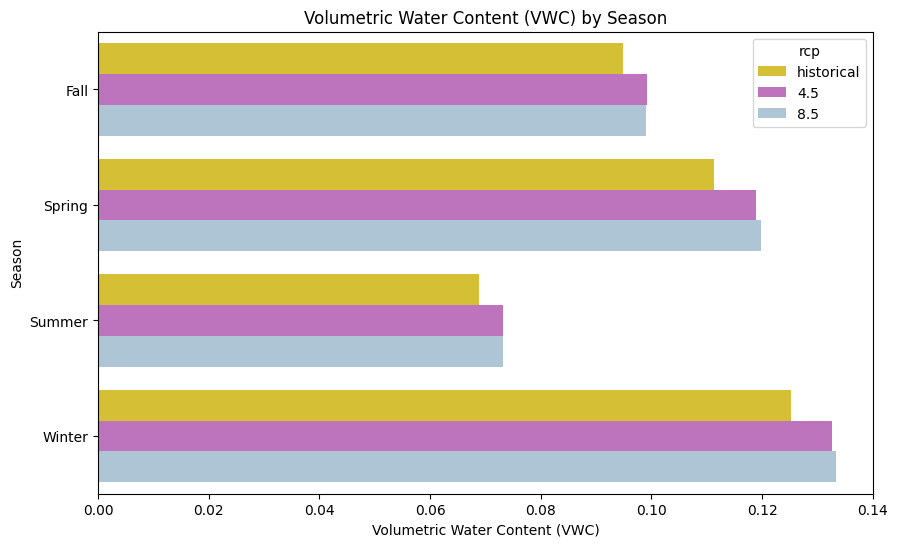

In [296]:
colors = ["#EED21B", "#CA68C8", "#A7C6DA"] 
sns.set_palette(sns.color_palette(colors))

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=vwc_grouped, x="vwc", y="season", hue="rcp", orient="h", errorbar=None)

plt.xlabel("Volumetric Water Content (VWC)")
plt.ylabel("Season")
plt.title("Volumetric Water Content (VWC) by Season")

ax.set_yticklabels(["Fall", "Spring", "Summer", "Winter"])

plt.show()

### Write up






### Summer dataset

#### First Visualization

In [297]:
# load the data
summer = pd.read_csv('./data/cleaned_data/summer_data.csv')

# further data processing
summer_copy = summer.copy()
summer_copy = summer.drop(['long', 'lat', 'rcp'], axis=1)

summer_copy = summer_copy.groupby(['year']).mean().reset_index()

# convert the year column to string type
summer_copy['year'] = summer_copy['year'].astype('str')

# round the columns
summer_copy = summer_copy.round({'drysoildays_summer_whole': 3, 'evap_summer': 3, 'nondryswa_summer_whole': 3, 'ppt_summer': 3, 'tmax_summer': 3, 'vwc_summer_whole': 3})

# rename the columns
# summer_copy.rename(columns={
#     'year': 'Year',
#     'drysoildays_summer_whole': 'Count of Days with Dry Soil (< -3.9MPa)',
#     'evap_summer': 'Evaporation',
#     'nondryswa_summer_whole': 'Non-Dry Soil Water Availability (> -3.9MPa)(cm)',
#     'ppt_summer': 'Precipitation',
#     'tmax_summer': 'Maximum Temperature',
#     'vwc_summer_whole': 'Volumetric Water Content'
# }, inplace=True)

summer_copy.to_csv('./data/cleaned_data/summer_data_2.csv', index=True)
summer_copy

,year,drysoildays_summer_whole,evap_summer,nondryswa_summer_whole,ppt_summer,tmax_summer,vwc_summer_whole
0,1980,7.856,2.877,0.272,3.993,36.822,0.067
1,1981,6.881,4.098,0.213,9.247,37.152,0.066
2,1982,7.139,3.790,0.298,9.448,36.545,0.070
3,1983,6.440,4.050,0.311,10.045,34.954,0.071
4,1984,6.792,4.044,0.246,9.134,35.494,0.068
5,1985,7.147,3.006,0.276,5.723,37.114,0.068
6,1986,7.016,3.852,0.264,9.585,35.409,0.069
7,1987,6.688,3.763,0.349,10.672,34.729,0.073
8,1988,7.156,3.832,0.244,8.564,35.757,0.068
9,1989,7.207,3.401,0.236,7.221,37.561,0.067


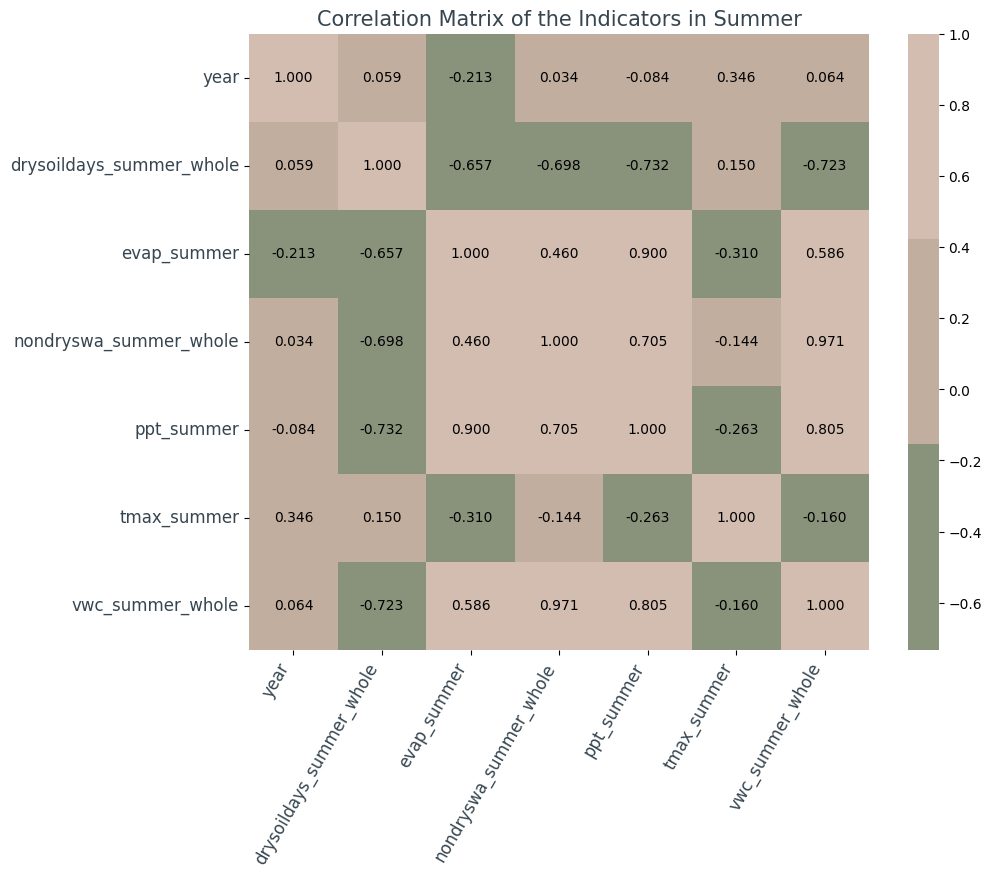

In [298]:
# plot a correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(summer_copy.corr(), annot=True, cmap=sns.color_palette(["#89937C", "#C1AE9F", "#D3BDB0"], as_cmap=True), annot_kws={'size': 10, 'color': 'black'}, fmt='.3f')
plt.title('Correlation Matrix of the Indicators in Summer', fontsize=15, color='#36454F')
plt.xticks(rotation=60, ha='right', fontsize=12, color='#36454F')
plt.yticks(rotation=0, fontsize=12, color='#36454F')
plt.show()

In [299]:
summer_indicators = summer_copy.copy()
# drop the unnecessary columns
summer_indicators = summer_indicators.drop(columns=['nondryswa_summer_whole', 'tmax_summer', 'vwc_summer_whole'], axis=1)

# normalize the data
scaler2 = MinMaxScaler()
normalize_columns = ['drysoildays_summer_whole', 'evap_summer', 'ppt_summer']
summer_indicators = summer_indicators.copy()
summer_indicators[normalize_columns] = scaler2.fit_transform(summer_indicators[normalize_columns])
summer_indicators

,year,drysoildays_summer_whole,evap_summer,ppt_summer
0,1980,0.514445,0.000000,0.000000
1,1981,0.256030,0.832311,0.577172
2,1982,0.324410,0.622359,0.599253
3,1983,0.139147,0.799591,0.664836
4,1984,0.232441,0.795501,0.564759
5,1985,0.326531,0.087935,0.190047
6,1986,0.291810,0.664622,0.614303
7,1987,0.204877,0.603954,0.733714
8,1988,0.328916,0.650988,0.502142
9,1989,0.342433,0.357192,0.354608


In [300]:
# plot a line graph of drysoildays_summer_whole, evap_summer, nondryswa_summer_whole, ppt_summer, and tmax_summer
fig = px.line(summer_indicators, x='year', y=['drysoildays_summer_whole', 'evap_summer', 'ppt_summer'], 
              hover_name='year', template='simple_white', color_discrete_sequence=["#EED21B", "#CA68C8", "#A7C6DA"])

fig.for_each_trace(lambda trace: trace.update(name = trace.name.replace('drysoildays_summer_whole', 'Days of Dry Soil (< -3.9 MPa)')
                                                      .replace('evap_summer', 'Evaporation')
                                                      .replace('ppt_summer', 'Precipitation')))

fig.update_traces(mode = 'markers+lines', hovertemplate=None)
fig.update_layout(title='Something of the Summer Data', xaxis_title='Year', yaxis_title='Values', hovermode = 'x', legend_title='Summer Indicators')

fig.show()

In [301]:
# plot a line graph of drysoildays_summer_whole, evap_summer, nondryswa_summer_whole, ppt_summer, and tmax_summer
fig = px.line(summer_copy, x='year', y=['drysoildays_summer_whole', 'evap_summer', 'ppt_summer'], 
              hover_name='year', template='simple_white', color_discrete_sequence=["#EED21B", "#CA68C8", "#A7C6DA"])

fig.for_each_trace(lambda trace: trace.update(name = trace.name.replace('drysoildays_summer_whole', 'Days of Dry Soil (< -3.9 MPa)')
                                                      .replace('evap_summer', 'Evaporation')
                                                      .replace('ppt_summer', 'Precipitation')))

fig.update_traces(mode = 'markers+lines', hovertemplate=None)
fig.update_layout(title='Something of the Summer Data', xaxis_title='Year', yaxis_title='Values', hovermode = 'x', legend_title='Summer Indicators')

fig.show()

In [302]:
df.columns

Index(['long', 'lat', 'year', 'timeperiod', 'rcp', 'scenario', 'treecanopy',
       'ann_herb', 'bare', 'herb', 'litter', 'shrub',
       'drysoildays_summer_whole', 'evap_summer',
       'extremeshorttermdrystress_summer_whole', 'frostdays_winter',
       'nondryswa_summer_whole', 'ppt_winter', 'ppt_summer', 'ppt_annual',
       't_winter', 't_summer', 't_annual', 'tmax_summer', 'tmin_winter',
       'vwc_winter_whole', 'vwc_spring_whole', 'vwc_summer_whole',
       'vwc_fall_whole'],
      dtype='object')

In [303]:
# plot out relatiionship between VWC and evaporation and precipitation
# copy the data
summer_copy_2 = summer.copy()
summer_copy_2

,long,lat,year,rcp,drysoildays_summer_whole,evap_summer,nondryswa_summer_whole,ppt_summer,tmax_summer,vwc_summer_whole
0,-110.0472,37.60413,1980,historical,7.368,3.446,0.285,2.69,37.050,NaN
1,-110.0472,37.60413,1980,historical,7.368,3.446,0.285,2.69,37.050,NaN
2,-110.0472,37.60413,1980,historical,7.368,3.446,0.285,2.69,37.050,NaN
3,-110.0472,37.60413,1980,historical,7.368,3.446,0.285,2.69,37.050,NaN
4,-110.0472,37.60413,1980,historical,0.000,1.560,0.032,7.44,37.104,0.041876
...,...,...,...,...,...,...,...,...,...,...
69618,-109.9659,37.62525,2024,8.5,0.000,3.557,0.552,7.44,37.104,0.091433
69619,-109.9659,37.62525,2024,8.5,0.000,2.398,0.107,7.44,37.104,0.086355
69620,-109.9659,37.62525,2024,8.5,0.000,3.000,0.595,7.44,37.104,0.091992
69621,-109.9659,37.62525,2024,8.5,0.000,3.702,0.121,7.44,37.104,0.087115


In [304]:
# drop the unnecessary columns
summer_copy_2 = summer_copy_2.drop(columns=['long', 'lat', 'rcp', 'drysoildays_summer_whole', 'nondryswa_summer_whole'], axis=1)
# drop the null values
summer_copy_2 = summer_copy_2.dropna().reset_index(drop=True)
# group by year
summer_copy_2 = summer_copy_2.groupby('year', as_index=False).mean().reset_index(drop=True)
# normalize the data
scaler = MinMaxScaler()
normalize_columns = ['evap_summer', 'ppt_summer', 'vwc_summer_whole', 'tmax_summer']
summer_copy_2[normalize_columns] = scaler.fit_transform(summer_copy_2[normalize_columns])
# round the columns
summer_copy_2 = summer_copy_2.round({'evap_summer': 3, 'ppt_summer': 3, 'tmax_summer': 3, 'vwc_summer_whole': 3})
summer_copy_2

,year,evap_summer,ppt_summer,tmax_summer,vwc_summer_whole
0,1980,0.000,0.355,0.671,0.264
1,1981,0.796,0.869,0.800,0.158
2,1982,0.613,0.520,0.657,0.547
3,1983,0.825,0.538,0.586,0.590
4,1984,0.815,0.520,0.613,0.331
5,1985,0.131,0.221,0.732,0.363
6,1986,0.651,0.529,0.603,0.419
7,1987,0.619,0.558,0.576,0.824
8,1988,0.672,0.483,0.627,0.282
9,1989,0.375,0.317,1.000,0.256


In [305]:
# plot a line graph of drysoildays_summer_whole, evap_summer, nondryswa_summer_whole, ppt_summer, and tmax_summer
fig = px.line(summer_copy_2, x='year', y=['vwc_summer_whole', 'evap_summer', 'ppt_summer', 'tmax_summer'], 
              hover_name='year', template='simple_white', color_discrete_sequence=["#000000", "#EED21B", "#CA68C8", "#A7C6DA"])

# fig.for_each_trace(lambda trace: trace.update(name = trace.name.replace('drysoildays_summer_whole', 'Days of Dry Soil (< -3.9 MPa)')
#                                                       .replace('evap_summer', 'Evaporation')
#                                                       .replace('ppt_summer', 'Precipitation')))

fig.update_traces(mode = 'markers+lines', hovertemplate=None)
fig.update_layout(title='Something of the Summer Data', xaxis_title='Year', yaxis_title='Values', hovermode = 'x', legend_title='Summer Indicators')

fig.show()

In [306]:
# save the data to csv file
summer_copy_2.to_csv('./data/cleaned_data/relationship_evap_ppt_vwc.csv')

#### Second Visualization

In [444]:
# spider chart of summer data
summer_copy_2 = summer.copy()
summer_copy_2

,long,lat,year,rcp,drysoildays_summer_whole,evap_summer,nondryswa_summer_whole,ppt_summer,tmax_summer,vwc_summer_whole
0,-110.0472,37.60413,1980,historical,7.368,3.446,0.285,2.69,37.050,NaN
1,-110.0472,37.60413,1980,historical,7.368,3.446,0.285,2.69,37.050,NaN
2,-110.0472,37.60413,1980,historical,7.368,3.446,0.285,2.69,37.050,NaN
3,-110.0472,37.60413,1980,historical,7.368,3.446,0.285,2.69,37.050,NaN
4,-110.0472,37.60413,1980,historical,0.000,1.560,0.032,7.44,37.104,0.041876
...,...,...,...,...,...,...,...,...,...,...
69618,-109.9659,37.62525,2024,8.5,0.000,3.557,0.552,7.44,37.104,0.091433
69619,-109.9659,37.62525,2024,8.5,0.000,2.398,0.107,7.44,37.104,0.086355
69620,-109.9659,37.62525,2024,8.5,0.000,3.000,0.595,7.44,37.104,0.091992
69621,-109.9659,37.62525,2024,8.5,0.000,3.702,0.121,7.44,37.104,0.087115


In [445]:
# drop unnecessary columns
summer_copy_2 = summer_copy_2.drop(['long', 'lat', 'rcp'], axis=1)

In [446]:
summer_mean = summer_copy_2.groupby(['year']).mean().reset_index()
# normalize each column
scaler = MinMaxScaler()
normalization = ['drysoildays_summer_whole', 'evap_summer', 'nondryswa_summer_whole', 'ppt_summer', 'tmax_summer']
summer_norm = summer_mean.copy()
summer_norm[normalization] = scaler.fit_transform(summer_norm[normalization])

In [448]:
# get rid of the first row
summer_norm = summer_norm.iloc[1:, :]

# save the normalized data to a csv file
summer_norm.to_csv('./data/cleaned_data/summer_data_normalized.csv', index=False)

summer_norm

,year,drysoildays_summer_whole,evap_summer,nondryswa_summer_whole,ppt_summer,tmax_summer,vwc_summer_whole
1,1981,0.255970,0.832378,0.101002,0.577175,0.792399,0.066236
2,1982,0.324536,0.622308,0.559199,0.599269,0.593962,0.070423
3,1983,0.139149,0.799324,0.629162,0.664877,0.073535,0.070878
4,1984,0.232453,0.795393,0.278620,0.564805,0.250122,0.068098
5,1985,0.326470,0.088161,0.436613,0.190075,0.779893,0.068432
6,1986,0.291818,0.664557,0.376677,0.614292,0.222361,0.069044
7,1987,0.204933,0.604053,0.833924,0.733650,0.000000,0.073397
8,1988,0.329069,0.650974,0.265041,0.502173,0.336115,0.067566
9,1989,0.342523,0.357455,0.222188,0.354591,0.926105,0.067286
10,1990,0.832580,0.322382,0.025741,0.243596,0.700367,0.065655


In [451]:
# filter out 1981 and 2018 and 2024 data each
summer_1981 = summer_norm[summer_norm['year'] == 1981]
summer_2018 = summer_norm[summer_norm['year'] == 2018]
summer_2024 = summer_norm[summer_norm['year'] == 2024]

# round all the data
summer_1981 = summer_1981.round(3)
summer_2018 = summer_2018.round(3)
summer_2024 = summer_2024.round(3)

In [452]:
summer_1981

,year,drysoildays_summer_whole,evap_summer,nondryswa_summer_whole,ppt_summer,tmax_summer,vwc_summer_whole
1,1981,0.256,0.832,0.101,0.577,0.792,0.066


In [454]:
summer_2018

,year,drysoildays_summer_whole,evap_summer,nondryswa_summer_whole,ppt_summer,tmax_summer,vwc_summer_whole
38,2018,0.868,0.093,0.054,0.177,0.366,0.065


In [455]:
summer_2024

,year,drysoildays_summer_whole,evap_summer,nondryswa_summer_whole,ppt_summer,tmax_summer,vwc_summer_whole
42,2024,0.417,0.295,0.562,0.33,0.934,0.07


In [341]:
# display(Javascript("""
#     <div class="flourish-embed flourish-radar" data-src="visualisation/17966848"><script src="https://public.flourish.studio/resources/embed.js"></script></div>
# """))

### Summer vs. Winter Dataset

In [311]:
# load the data
summer_winter = pd.read_csv('./data/cleaned_data/summer_winter_data.csv')
summer_winter.head()

,long,lat,year,rcp,ppt_annual,ppt_summer,ppt_winter,t_summer,t_winter,tmax_summer,tmin_winter
0,-110.0472,37.60413,1980,historical,13.79,2.69,13.79,23.15924,0.964835,37.05,NaN
1,-110.0472,37.60413,1980,historical,2.69,2.69,13.79,23.15924,0.964835,37.05,NaN
2,-110.0472,37.60413,1980,historical,13.79,2.69,13.79,23.15924,0.964835,37.05,NaN
3,-110.0472,37.60413,1980,historical,2.69,2.69,13.79,23.15924,0.964835,37.05,NaN
4,-110.0472,37.60413,1980,historical,NaN,NaN,NaN,NaN,NaN,NaN,-12.45


In [312]:
df.columns

Index(['long', 'lat', 'year', 'timeperiod', 'rcp', 'scenario', 'treecanopy',
       'ann_herb', 'bare', 'herb', 'litter', 'shrub',
       'drysoildays_summer_whole', 'evap_summer',
       'extremeshorttermdrystress_summer_whole', 'frostdays_winter',
       'nondryswa_summer_whole', 'ppt_winter', 'ppt_summer', 'ppt_annual',
       't_winter', 't_summer', 't_annual', 'tmax_summer', 'tmin_winter',
       'vwc_winter_whole', 'vwc_spring_whole', 'vwc_summer_whole',
       'vwc_fall_whole'],
      dtype='object')

## Can we predict the data?

using the location, rcp, scenario, year, greenery data, and vwc data, can we predict the temperature data?

In [313]:
df

,long,lat,year,timeperiod,rcp,scenario,treecanopy,ann_herb,bare,herb,...,ppt_annual,t_winter,t_summer,t_annual,tmax_summer,tmin_winter,vwc_winter_whole,vwc_spring_whole,vwc_summer_whole,vwc_fall_whole
0,-110.0472,37.60413,1980,Hist,historical,sc1,0,0,84,5,...,13.79,0.964835,23.15924,23.159240,37.05,NaN,NaN,NaN,NaN,NaN
1,-110.0472,37.60413,1980,Hist,historical,sc1,0,0,84,5,...,2.69,0.964835,23.15924,0.964835,37.05,NaN,NaN,NaN,NaN,NaN
2,-110.0472,37.60413,1980,Hist,historical,sc1,0,0,84,5,...,13.79,0.964835,23.15924,0.964835,37.05,NaN,NaN,NaN,NaN,NaN
3,-110.0472,37.60413,1980,Hist,historical,sc1,0,0,84,5,...,2.69,0.964835,23.15924,23.159240,37.05,NaN,NaN,NaN,NaN,NaN
4,-110.0472,37.60413,1980,Hist,historical,sc1,0,0,84,5,...,NaN,NaN,NaN,NaN,NaN,-12.45,0.113447,0.096831,0.041876,0.052298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55797,-109.9659,37.62525,2024,NT,8.5,sc57,18,0,37,18,...,NaN,NaN,NaN,NaN,NaN,-12.16,0.142255,0.173792,0.091433,0.106907
55798,-109.9659,37.62525,2024,NT,8.5,sc58,18,0,37,18,...,NaN,NaN,NaN,NaN,NaN,-12.16,0.166254,0.158146,0.086355,0.095905
55799,-109.9659,37.62525,2024,NT,8.5,sc59,18,0,37,18,...,NaN,NaN,NaN,NaN,NaN,-10.38,0.151342,0.175814,0.091992,0.109333
55800,-109.9659,37.62525,2024,NT,8.5,sc60,18,0,37,18,...,NaN,NaN,NaN,NaN,NaN,-10.61,0.122249,0.104884,0.087115,0.118908


In [314]:
# drop the unnecessary columns
df2 = df.copy()
df2 = df2.drop(columns=['timeperiod'])

# fill the null values in all columns with the mean
fill_null = ['ppt_annual', 'drysoildays_summer_whole', 'evap_summer', 'extremeshorttermdrystress_summer_whole','frostdays_winter', 'nondryswa_summer_whole', 'ppt_winter', 'ppt_summer', 't_winter', 't_summer', 't_annual', 'tmax_summer', 'tmin_winter', 'vwc_winter_whole', 'vwc_spring_whole', 'vwc_summer_whole', 'vwc_fall_whole']
df2.loc[:, fill_null] = df2[fill_null].fillna(df2[fill_null].mean())
df2 = df2.dropna()

# categorize the rcp, scenario column
df2['rcp'] = pd.factorize(df2['rcp'])[0]
df2['scenario'] = pd.factorize(df2['scenario'])[0]
df2

,long,lat,year,rcp,scenario,treecanopy,ann_herb,bare,herb,litter,...,ppt_annual,t_winter,t_summer,t_annual,tmax_summer,tmin_winter,vwc_winter_whole,vwc_spring_whole,vwc_summer_whole,vwc_fall_whole
0,-110.0472,37.60413,1980,0,0,0,0,84,5,11,...,13.790000,0.964835,23.15924,23.159240,37.050000,-14.184993,0.128169,0.112395,0.069182,0.095330
1,-110.0472,37.60413,1980,0,0,0,0,84,5,11,...,2.690000,0.964835,23.15924,0.964835,37.050000,-14.184993,0.128169,0.112395,0.069182,0.095330
2,-110.0472,37.60413,1980,0,0,0,0,84,5,11,...,13.790000,0.964835,23.15924,0.964835,37.050000,-14.184993,0.128169,0.112395,0.069182,0.095330
3,-110.0472,37.60413,1980,0,0,0,0,84,5,11,...,2.690000,0.964835,23.15924,23.159240,37.050000,-14.184993,0.128169,0.112395,0.069182,0.095330
4,-110.0472,37.60413,1980,0,0,0,0,84,5,11,...,7.768906,0.821157,23.59969,11.736603,37.103857,-12.450000,0.113447,0.096831,0.041876,0.052298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55797,-109.9659,37.62525,2024,2,36,18,0,37,18,19,...,7.768906,0.821157,23.59969,11.736603,37.103857,-12.160000,0.142255,0.173792,0.091433,0.106907
55798,-109.9659,37.62525,2024,2,37,18,0,37,18,19,...,7.768906,0.821157,23.59969,11.736603,37.103857,-12.160000,0.166254,0.158146,0.086355,0.095905
55799,-109.9659,37.62525,2024,2,38,18,0,37,18,19,...,7.768906,0.821157,23.59969,11.736603,37.103857,-10.380000,0.151342,0.175814,0.091992,0.109333
55800,-109.9659,37.62525,2024,2,39,18,0,37,18,19,...,7.768906,0.821157,23.59969,11.736603,37.103857,-10.610000,0.122249,0.104884,0.087115,0.118908


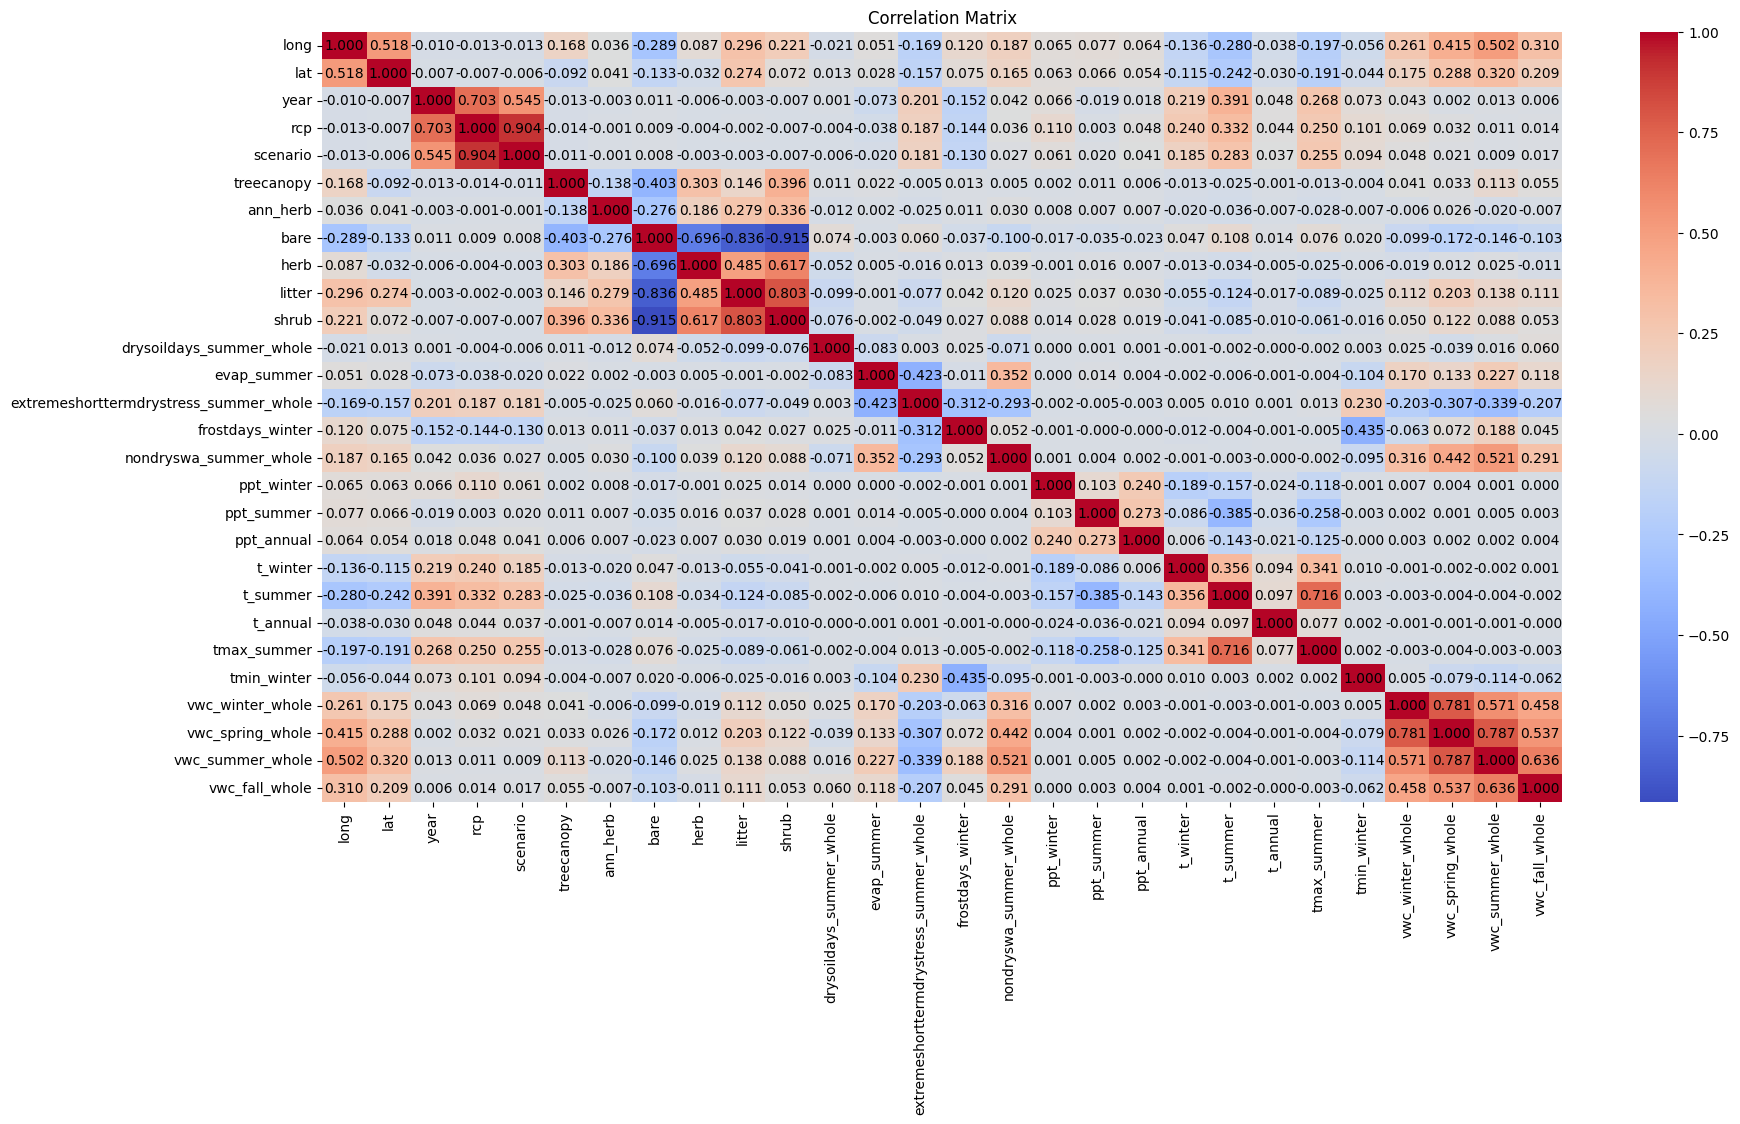

In [315]:
# plot a correlation matrix
plt.figure(figsize=(20, 10))
corr_matrix = df2.corr()
sns.heatmap(corr_matrix, annot=True, annot_kws={'size': 10, 'color': 'black'}, fmt='.3f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [316]:
# select the only columns that I want
df2_selected = df2[['long', 'lat', 'year', 'rcp', 'scenario', 't_annual', 'treecanopy', 'ann_herb', 'bare', 'herb', 'litter', 'shrub']]
df2_selected

,long,lat,year,rcp,scenario,t_annual,treecanopy,ann_herb,bare,herb,litter,shrub
0,-110.0472,37.60413,1980,0,0,23.159240,0,0,84,5,11,7
1,-110.0472,37.60413,1980,0,0,0.964835,0,0,84,5,11,7
2,-110.0472,37.60413,1980,0,0,0.964835,0,0,84,5,11,7
3,-110.0472,37.60413,1980,0,0,23.159240,0,0,84,5,11,7
4,-110.0472,37.60413,1980,0,0,11.736603,0,0,84,5,11,7
...,...,...,...,...,...,...,...,...,...,...,...,...
55797,-109.9659,37.62525,2024,2,36,11.736603,18,0,37,18,19,22
55798,-109.9659,37.62525,2024,2,37,11.736603,18,0,37,18,19,22
55799,-109.9659,37.62525,2024,2,38,11.736603,18,0,37,18,19,22
55800,-109.9659,37.62525,2024,2,39,11.736603,18,0,37,18,19,22


<Axes: >

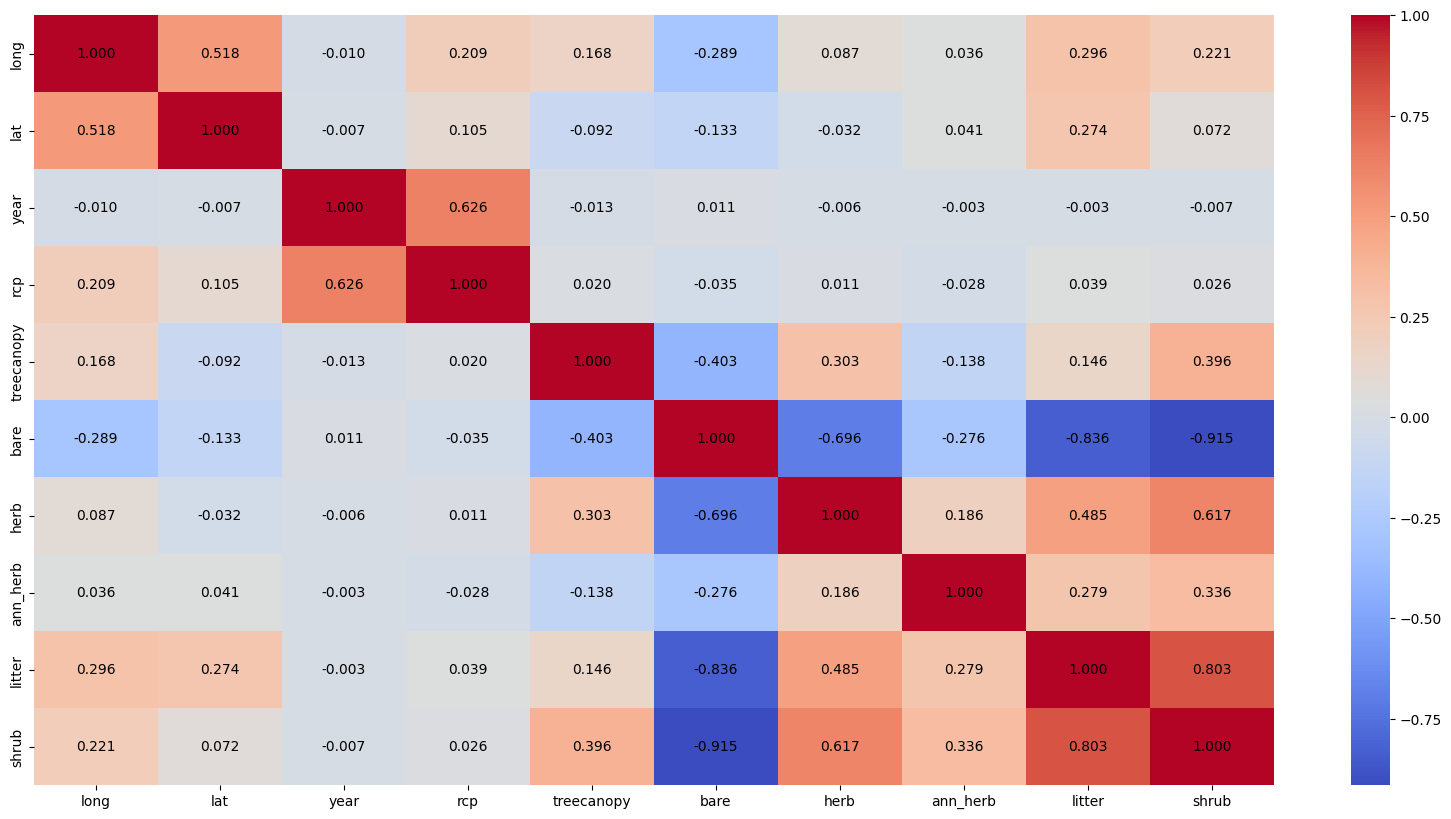

In [317]:
# load the greenery data
greenery2 = pd.read_csv('./data/cleaned_data/greenery_data.csv')
greenery2.head()
# drop the total column
greenery2 = greenery2.drop(columns=['total'], axis=1)

# categorize the rcp, scenario column
greenery2['rcp'] = pd.factorize(greenery2['rcp'])[0]

# plot a corr matrix
plt.figure(figsize=(20, 10))
corr_matrix = greenery2.corr()
sns.heatmap(corr_matrix, annot=True, annot_kws={'size': 10, 'color': 'black'}, fmt='.3f', cmap='coolwarm')

In [318]:
# get the data of correlation matrix
corr_matrix

,long,lat,year,rcp,treecanopy,bare,herb,ann_herb,litter,shrub
long,1.000000,0.517722,-0.010216,0.209381,0.167540,-0.288960,0.087233,0.036345,0.296460,0.220507
lat,0.517722,1.000000,-0.006727,0.105204,-0.092238,-0.132615,-0.032376,0.040532,0.274361,0.072354
year,-0.010216,-0.006727,1.000000,0.626099,-0.013029,0.010531,-0.006414,-0.002988,-0.003262,-0.006884
rcp,0.209381,0.105204,0.626099,1.000000,0.020231,-0.035350,0.010591,-0.027614,0.039415,0.025514
treecanopy,0.167540,-0.092238,-0.013029,0.020231,1.000000,-0.403429,0.302502,-0.137582,0.145554,0.396029
bare,-0.288960,-0.132615,0.010531,-0.035350,-0.403429,1.000000,-0.695640,-0.276297,-0.836482,-0.914659
herb,0.087233,-0.032376,-0.006414,0.010591,0.302502,-0.695640,1.000000,0.186195,0.485019,0.616783
ann_herb,0.036345,0.040532,-0.002988,-0.027614,-0.137582,-0.276297,0.186195,1.000000,0.279376,0.336135
litter,0.296460,0.274361,-0.003262,0.039415,0.145554,-0.836482,0.485019,0.279376,1.000000,0.803476
shrub,0.220507,0.072354,-0.006884,0.025514,0.396029,-0.914659,0.616783,0.336135,0.803476,1.000000


In [319]:
df

,long,lat,year,timeperiod,rcp,scenario,treecanopy,ann_herb,bare,herb,...,ppt_annual,t_winter,t_summer,t_annual,tmax_summer,tmin_winter,vwc_winter_whole,vwc_spring_whole,vwc_summer_whole,vwc_fall_whole
0,-110.0472,37.60413,1980,Hist,historical,sc1,0,0,84,5,...,13.79,0.964835,23.15924,23.159240,37.05,NaN,NaN,NaN,NaN,NaN
1,-110.0472,37.60413,1980,Hist,historical,sc1,0,0,84,5,...,2.69,0.964835,23.15924,0.964835,37.05,NaN,NaN,NaN,NaN,NaN
2,-110.0472,37.60413,1980,Hist,historical,sc1,0,0,84,5,...,13.79,0.964835,23.15924,0.964835,37.05,NaN,NaN,NaN,NaN,NaN
3,-110.0472,37.60413,1980,Hist,historical,sc1,0,0,84,5,...,2.69,0.964835,23.15924,23.159240,37.05,NaN,NaN,NaN,NaN,NaN
4,-110.0472,37.60413,1980,Hist,historical,sc1,0,0,84,5,...,NaN,NaN,NaN,NaN,NaN,-12.45,0.113447,0.096831,0.041876,0.052298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55797,-109.9659,37.62525,2024,NT,8.5,sc57,18,0,37,18,...,NaN,NaN,NaN,NaN,NaN,-12.16,0.142255,0.173792,0.091433,0.106907
55798,-109.9659,37.62525,2024,NT,8.5,sc58,18,0,37,18,...,NaN,NaN,NaN,NaN,NaN,-12.16,0.166254,0.158146,0.086355,0.095905
55799,-109.9659,37.62525,2024,NT,8.5,sc59,18,0,37,18,...,NaN,NaN,NaN,NaN,NaN,-10.38,0.151342,0.175814,0.091992,0.109333
55800,-109.9659,37.62525,2024,NT,8.5,sc60,18,0,37,18,...,NaN,NaN,NaN,NaN,NaN,-10.61,0.122249,0.104884,0.087115,0.118908


In [320]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df['rcp'] = pd.factorize(df['rcp'])[0]
df['scenario'] = pd.factorize(df['scenario'])[0]
df = df.dropna()

features = ['long', 'lat', 'year', 'rcp', 'scenario', 'treecanopy', 'ann_herb', 'bare', 'herb', 'litter', 'ppt_annual', 'vwc_winter_whole', 'vwc_spring_whole', 'vwc_summer_whole', 'vwc_fall_whole']
target_winter = 't_winter'
target_summer = 't_summer'
target_annual = 't_annual'

X = df[features]
y_winter = df[target_winter]
y_summer = df[target_summer]
y_annual = df[target_annual]

# Split the data into training and testing sets
X_train, X_test, y_train_winter, y_test_winter = train_test_split(X, y_winter, test_size=0.2, random_state=42)
X_train, X_test, y_train_summer, y_test_summer = train_test_split(X, y_summer, test_size=0.2, random_state=42)
X_train, X_test, y_train_annual, y_test_annual = train_test_split(X, y_annual, test_size=0.2, random_state=42)

# Train a regression model for winter temperature
model_winter = LinearRegression()
model_winter.fit(X_train, y_train_winter)

# Train a regression model for summer temperature
model_summer = LinearRegression()
model_summer.fit(X_train, y_train_summer)

# Train a regression model for annual temperature
model_annual = LinearRegression()
model_annual.fit(X_train, y_train_annual)

# Make predictions
y_pred_winter = model_winter.predict(X_test)
y_pred_summer = model_summer.predict(X_test)
y_pred_annual = model_annual.predict(X_test)

# Evaluate the models
print("Winter Temperature Prediction")
print("Mean Squared Error:", mean_squared_error(y_test_winter, y_pred_winter))
print("R2 Score:", r2_score(y_test_winter, y_pred_winter))

print("\nSummer Temperature Prediction")
print("Mean Squared Error:", mean_squared_error(y_test_summer, y_pred_summer))
print("R2 Score:", r2_score(y_test_summer, y_pred_summer))

print("\nAnnual Temperature Prediction")
print("Mean Squared Error:", mean_squared_error(y_test_annual, y_pred_annual))
print("R2 Score:", r2_score(y_test_annual, y_pred_annual))


Winter Temperature Prediction
Mean Squared Error: 2.035930086139957
R2 Score: 0.16768365655334394

Summer Temperature Prediction
Mean Squared Error: 0.6215809063140093
R2 Score: 0.5447162139854089

Annual Temperature Prediction
Mean Squared Error: 82.13705123403385
R2 Score: -0.10649154090043433
